<a href="https://colab.research.google.com/github/fritzpalomo/MO-IT128---Data-Mining-Principles/blob/main/Data_Mining_Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the transaction data
transactions = pd.read_csv('Transaction_Data.csv')

# Display basic information about the dataset
transactions.info(), transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    5050 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.4+ KB


(None,
    Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
 0               1          393  2023-01-01 00:00:00              3472.0   
 1               2          826  2023-01-01 01:00:00                 NaN   
 2               3          916  2023-01-01 02:00:00                10.0   
 3               4          109  2023-01-01 03:00:00                72.0   
 4               5          889  2023-01-01 04:00:00              1793.0   
 
   Transaction_Type  
 0         Purchase  
 1     Bill Payment  
 2         Purchase  
 3       Investment  
 4       Investment  )

In [2]:
# Load the product data
products = pd.read_csv('products_data.csv')

# Display basic information about the dataset
products.info(), products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     18 non-null     float64
 1   Product_Name   20 non-null     object 
 2   Product_Price  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


(None,
    Product_ID            Product_Name Product_Price
 0         1.0      FinPredictor Suite      ?140,000
 1         2.0  MarketMinder Analytics      ?168,000
 2         3.0    TrendWise Forecaster      ?100,800
 3         4.0  CustomerScope Insights      ?123,200
 4         5.0     SalesSync Optimizer       ?84,000)

In [3]:
# Load the feedback data
feedback = pd.read_csv('Customer_Feedback_Data.csv')

# Display basic information about the dataset
feedback.info(), feedback.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB


(None,
    Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
 0            1                10.0     Very satisfied                        9
 1            2                 3.0     Very satisfied                        3
 2            3                10.0     Very satisfied                        1
 3            4                 7.0  Needs improvement                        4
 4            5                 8.0     Unsatisfactory                        7)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Transaction_Date to datetime
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])

# Impute missing Transaction_Amount with median value
transactions['Transaction_Amount'].fillna(transactions['Transaction_Amount'].median(), inplace=True)

# Compute transaction frequency per customer
customer_transaction_counts = transactions.groupby('Customer_ID').size().reset_index(name='Transaction_Frequency')

# Compute average transaction amount per customer
customer_avg_transaction = transactions.groupby('Customer_ID')['Transaction_Amount'].mean().reset_index(name='Avg_Transaction_Amount')

# Aggregate data: Compute average transaction amount per day
daily_avg_transactions = transactions.groupby(transactions['Transaction_Date'].dt.date)['Transaction_Amount'].mean()

# Compute days since last transaction (Recency)
latest_date = transactions['Transaction_Date'].max()
recency = transactions.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
recency['Recency'] = (latest_date - recency['Transaction_Date']).dt.days
recency.drop(columns=['Transaction_Date'], inplace=True)

# Impute missing Satisfaction_Score with mean value
feedback['Satisfaction_Score'].fillna(feedback['Satisfaction_Score'].mean(), inplace=True)

products


<ipython-input-5-782efac4c7e7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Transaction_Amount'].fillna(transactions['Transaction_Amount'].median(), inplace=True)
<ipython-input-5-782efac4c7e7>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"
5,6.0,RevenueVue Dashboard,"?179,200"
6,7.0,DataBridge Integration Tool,"?151,200"
7,NaN,RiskRadar Monitor,"?151,200"
8,9.0,Product 9,"?112,000"
9,10.0,SegmentX Targeting,"?89,600"


In [6]:
transactions

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,2483.0,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment
...,...,...,...,...,...
5045,3034,317,2023-05-07 09:00:00,3018.0,Purchase
5046,583,336,2023-01-25 06:00:00,2670.0,Bill Payment
5047,1211,550,2023-02-20 10:00:00,3252.0,Bill Payment
5048,2259,258,2023-04-05 02:00:00,3442.0,Purchase


In [7]:
feedback

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7
...,...,...,...,...
5045,757,9.0,Good service,3
5046,969,2.0,Unsatisfactory,2
5047,248,4.0,Good service,3
5048,58,4.0,Unsatisfactory,10


In [8]:
# Sentiment analysis on Feedback_Comments
from textblob import TextBlob

feedback['Feedback_Comments'] = feedback['Feedback_Comments'].fillna('')

def get_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

feedback['Sentiment_Score'] = feedback['Feedback_Comments'].apply(get_sentiment)

# Create a Customer Loyalty Score
feedback['Customer_Loyalty_Score'] = (feedback['Satisfaction_Score'] + feedback['Likelihood_to_Recommend']) / 2

# Merge customer-level features
customer_features = customer_transaction_counts.merge(customer_avg_transaction, on='Customer_ID', how='left')
customer_features = customer_features.merge(recency, on='Customer_ID', how='left')
customer_features = customer_features.merge(feedback[['Customer_ID', 'Sentiment_Score', 'Customer_Loyalty_Score']], on='Customer_ID', how='left')

# Descriptive statistics for key numerical features
summary_stats = customer_features[['Transaction_Frequency', 'Avg_Transaction_Amount', 'Recency', 'Customer_Loyalty_Score']].describe()

# Show summary statistics
summary_stats

,Transaction_Frequency,Avg_Transaction_Amount,Recency,Customer_Loyalty_Score
count,5015.000000,5015.000000,5015.000000,5015.000000
mean,5.109272,3005.698472,38.238086,5.626736
std,2.253222,6393.961795,36.270193,2.288313
min,1.000000,286.000000,0.000000,1.000000
25%,3.000000,1993.666667,11.000000,4.000000
50%,5.000000,2446.666667,28.000000,5.500000
75%,7.000000,2917.000000,55.000000,7.000000
max,14.000000,144144.000000,197.000000,34.500000


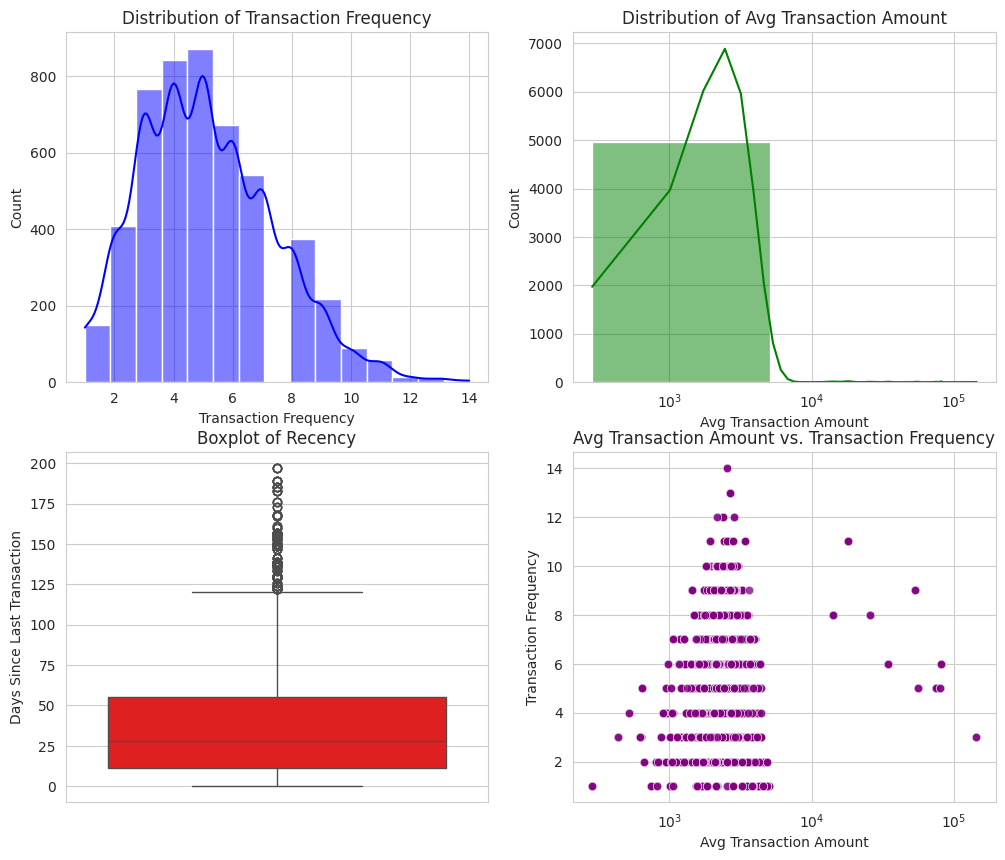

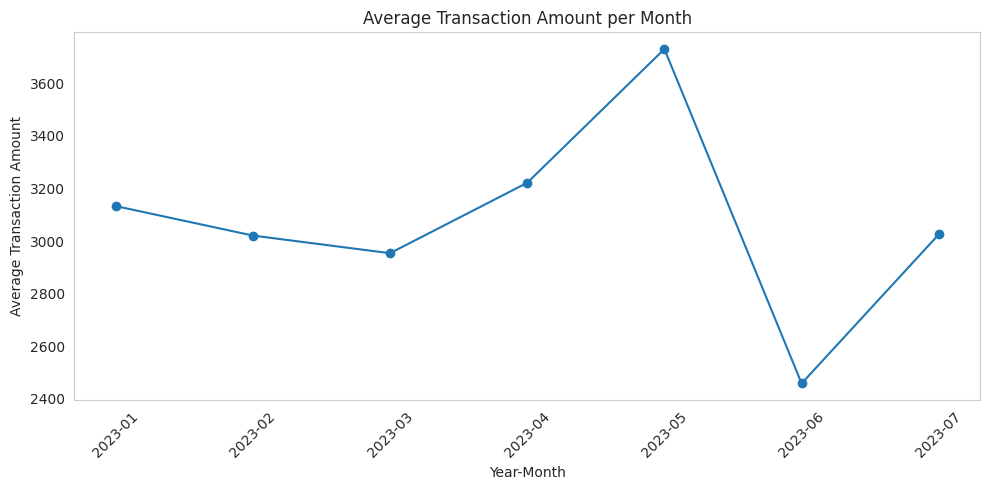

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots for better visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Transaction Frequency
sns.histplot(customer_features['Transaction_Frequency'], bins=15, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Transaction Frequency')
axes[0, 0].set_xlabel('Transaction Frequency')
axes[0, 0].set_ylabel('Count')

# Histogram for Average Transaction Amount (log scale for better visibility)
sns.histplot(customer_features['Avg_Transaction_Amount'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Avg Transaction Amount')
axes[0, 1].set_xlabel('Avg Transaction Amount')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xscale('log')  # Log scale to handle skewed distribution

# Boxplot for Recency
sns.boxplot(y=customer_features['Recency'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Boxplot of Recency')
axes[1, 0].set_ylabel('Days Since Last Transaction')

# Scatterplot for Avg Transaction Amount vs. Transaction Frequency
sns.scatterplot(x=customer_features['Avg_Transaction_Amount'], y=customer_features['Transaction_Frequency'],
                ax=axes[1, 1], alpha=0.5, color='purple')
axes[1, 1].set_title('Avg Transaction Amount vs. Transaction Frequency')
axes[1, 1].set_xlabel('Avg Transaction Amount')
axes[1, 1].set_ylabel('Transaction Frequency')
axes[1, 1].set_xscale('log')  # Log scale for better visualization

# Plot line graph for average Transactions per month
transactions['YearMonth'] = transactions['Transaction_Date'].dt.to_period('M')
avg_transactions_per_month = transactions.groupby('YearMonth')['Transaction_Amount'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_transactions_per_month.index.astype(str), avg_transactions_per_month, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Average Transaction Amount per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Transaction Amount')
plt.grid()


# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [10]:
# Final check
print(products.head())
print(transactions.head())
print(customer_features.head())

   Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite      ?140,000
1         2.0  MarketMinder Analytics      ?168,000
2         3.0    TrendWise Forecaster      ?100,800
3         4.0  CustomerScope Insights      ?123,200
4         5.0     SalesSync Optimizer       ?84,000
   Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0               1          393 2023-01-01 00:00:00              3472.0   
1               2          826 2023-01-01 01:00:00              2483.0   
2               3          916 2023-01-01 02:00:00                10.0   
3               4          109 2023-01-01 03:00:00                72.0   
4               5          889 2023-01-01 04:00:00              1793.0   

  Transaction_Type YearMonth  
0         Purchase   2023-01  
1     Bill Payment   2023-01  
2         Purchase   2023-01  
3       Investment   2023-01  
4       Investment   2023-01  
   Customer_ID  Transaction_Frequency  Avg_Transaction_Am